In [235]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from itertools import combinations
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *

# 6.8 Exercises

## Conceptual

**1.** We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing $0, 1, 2, . . . , p$ predictors. Explain your answers:

**(a)** Which of the three models with k predictors has the smallest training RSS?

>Best subset. It will exhaustively try the most models, at the expense of computation. Forward and Backward follow a path, which may not necessarily be the best.

**(b)** Which of the three models with k predictors has the smallest test RSS?

> Unknown. Depends on the path of Forward and Backward and also the split of the train/test.

**(c)**
i. True

ii. True

iii. False

iv. False

v. False

**(2)**

**(a)** The lasso, relative to least squares is: **iv** Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

**(b)** Ridge regression, relative to least squares is: **iv** Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias. (same as lasso)

**(c)** Non-linear methods relative to least squares is: **ii** More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

**(3)** Lasso

**(a)** As we increase $s$ from zero, the training RSS will: **iv** steadily decrease. Because as the penalty $\lambda$ increases
the RSS will decrease to stay within the budget $s$.

**(b)** As we increase $s$ from zero, the test RSS will: **ii** decrease initially, and then eventually start increasing in a U shape. Because the model will in initially improve on the test RSS (move down to the bottom of the U shape), but then the model will start overfitting (increasing test RSS) and move up out of the bottom of the U shape.

**(c)** As we increase $s$ from zero, the variance will: **iii** steadily increase. Because as $s$ increases the coeffiecients will grow larger. If $s$ is large enough it could yield the least squares solution. Which has higher variance.

**(d)** As we increase $s$ from zero, the (squared) bias will: **iv** steadily decrease. Remember, when  $s$ is zero coefficients are zero, so we are left with just a constant (the intercept). Which has high bias. As we increase $s$ from zero our bias will improve (steadily decrease).

**(e)** As we increase $s$ from zero, the irreducible error will: **v** remain constant. No matter any model method or measure or regularization there remains an irreducible error (Bayes error) that will remain constant. This error cannot be reduced and is due to randomness or natural variabliliy in a system.

**(4)** Ridge regression

**(a)** As we increase $\lambda$ from zero, the training RSS will: **iii** steadily increase. The shrinkage penalty increases as $\lambda$ increases from zero. The increase in penalty will cause the training RSS to decrease.

**(b)** As we increase $\lambda$ from zero, the test RSS will: **ii** decrease initially, and then eventually start increasing in a U shape. Because we initally start to fit the data well, then begin overfitting. Characteristic U shape for our test error. We initially rapidly reduce variance at little cost to the bias. As $\lambda$ grows, the decrease in variance slows and a large increase in bias results. The bottom of the U shape in the test RSS is where the bias/variance tradeoff is optimal.

**(c)** As we increase $\lambda$ from zero, the variance will: **iv** steadily decrease. When $\lambda$ equals zero we have the least squares estimates, which can have higher variance. As $\lambda$ increases from zero the penalty shrinks the coefficients and decreases the variance.

**(d)** As we increase $\lambda$ from zero, the (squared) bias will: **iii** steadily increase. As coefficients move to zero, the model bias will increase. 

**(e)** As we increase $\lambda$ from zero, the irreducible error will: **v** remain constant. (same as #3)

**(5)**

Suppose that $n=2, p=2, x_{11}=x_{12}, x_{21}=x_{22}$. Furthermore, suppose that $y_1+y_2=0$ and $x_{11}+x_{21}=0$ and $x_{12}+x_{22}=0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{\beta}_0 = 0$


In [4]:
# example df that meets above conditions

d = {'x1': [-1, 1], 'x2': [-1, 1]}
df = pd.DataFrame(data=d)
df

,x1,x2
0,-1,-1
1,1,1


**(a)** Write out the ridge regression optimization problem in this setting.

Ridge regression optimization:

Minimize: $\sum\limits_{i=1}^n {(y_i - \hat{\beta}_0 - \sum\limits_{j=1}^p {\hat{\beta}_jx_j} )^2} + \lambda \sum\limits_{i=1}^p \hat{\beta}_i^2$

Here, $\hat{\beta}_0 = 0$ and $n = p = 2$. So, the optimization looks like:

Minimize: $(y_1 - \hat{\beta}_1x_{11} - \hat{\beta}_2x_{12})^2 + (y_2 - \hat{\beta}_1x_{21} - \hat{\beta}_2x_{22})^2 + \lambda (\hat{\beta}_1^2 + \hat{\beta}_2^2)$


**(b)** Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

From our example df:

$Minimize: (0-(\beta_1+\beta_2))^2 + (0-(-\beta_1-\beta_2))^2+\lambda(\beta_{1}^2+\beta_{2}^2)$

$= 2\beta_{1}^2+4\beta_1\beta_2+2\beta_{2}^2+\lambda(\beta_{1}^2+\beta_{2}^2)$

Derivative wrt $\beta_1$

$0=4\beta_1+4\beta_2+2\lambda\beta_1$

Derivative wrt $\beta_2$

$0=4\beta_2+4\beta_1+2\lambda\beta_2$

$\beta_1=\beta_2$

-----------
Another approach:

Now we are given that, $x_{11} = x_{12} = x_1$ and $x_{21} = x_{22} = x_2$. 

We take derivatives of above expression with respect to both $\hat{\beta_1}$ and $\hat{\beta_2}$ and setting them equal to zero find that,
$\hat{\beta^*}_1 = \frac{x_1y_1 + x_2y_2 - \hat{\beta^*}_2(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}$ and
$\hat{\beta^*}_2 = \frac{x_1y_1 + x_2y_2 - \hat{\beta^*}_1(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}$

Symmetry in these expressions suggests that $\hat{\beta^*}_1 = \hat{\beta^*}_2$

**(c)** Write out the lasso optimization problem in this setting.

Minimize: $\sum\limits_{i=1}^n {(y_i - \hat{\beta}_0 - \sum\limits_{j=1}^p {\hat{\beta}_jx_j} )^2} + \lambda \sum\limits_{i=1}^p |\hat{\beta_i}|$

Minimize: $(y_1 - \hat{\beta}_1x_{11} - \hat{\beta}_2x_{12})^2 + (y_2 - \hat{\beta}_1x_{21} - \hat{\beta}_2x_{22})^2 + \lambda (| \hat{\beta}_1 | + | \hat{\beta}_2 |)$

**6 (a)** Consider (6.12) with p = 1. For some choice of $y_1$ and $\lambda>0$, plot (6.12) as a function of $\beta_1$. Your plot should confirm that (6.12) is solved by (6.14).

**(6.12)** $(y - \beta)^2 + \lambda\beta^2$

**(6.14)** $y/(1+\lambda)$

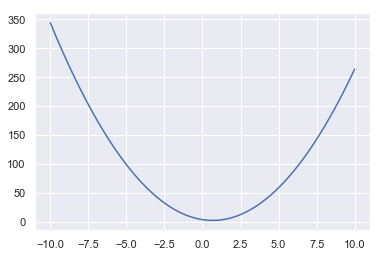

In [6]:
# select y=2 and lambda=2
beta = np.linspace(-10, 10, 1000)
y = 2
lam = 2
ridge = (y - beta)**2 + lam * beta**2

plt.plot(beta, ridge);

In [10]:
print(beta[np.argmin(ridge)])
print(y/(1+lam))

0.6706706706706704
0.6666666666666666


(b) Consider (6.13) with $p = 1$. For some choice of $y_1$ and $\lambda>0$, plot (6.13) as a function of $\beta_1$. Your plot should confirm that (6.13) is solved by (6.15).

**(6.13)** $(y-\beta)^2+\lambda|\beta|$ 

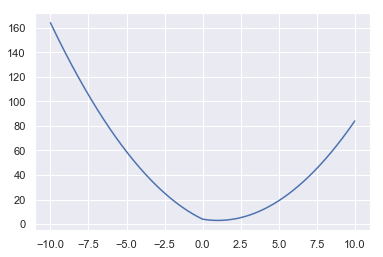

In [12]:
# select y=2 and lambda=2
beta = np.linspace(-10, 10, 1000)
y = 2
lam = 2
lasso = (y - beta)**2 + lam * np.absolute(beta)

plt.plot(beta, lasso);

In [14]:
print(beta[np.argmin(lasso)])
print(y-(lam/2)) # use correct estimate from 6.15

0.9909909909909906
1.0


## Applied

**8.** In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

**(a)** Use the `rnorm()` function to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100.

In [72]:
np.random.seed(0)
X = np.random.randn(100)
eps = np.random.randn(100)

**(b)** Generate a response vector $Y$ of length n = 100 according to the model

$Y = \beta_0 +\beta_1X +\beta_2X2 +\beta_3X3 + \epsilon$, 

where $\beta_0, \beta_1, \beta_2$, and $\beta_3$ are constants of your choice.

In [73]:
B0 = -2
B1 = 2
B2 = 3
B3 = 1.5

Y = B0 + B1*X + B2*X**2 + B3*X**3 + eps

**(c)** Perform best subset selection in order to choose the best model containing the predictors $X, X^2, . . . , X^{10}$. What is the best model obtained according to Cp, BIC, and adjusted R2?

In [74]:
# create a dataframe with x,...,x^10

df = pd.DataFrame({'x1': X
                  ,'x2': X**2
                  ,'x3': X**3
                  ,'x4': X**4
                  ,'x5': X**5
                  ,'x6': X**6
                  ,'x7': X**7
                  ,'x8': X**8
                  ,'x9': X**9
                  ,'x10': X**10
                  ,'Y': Y})

df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Y
0,1.764052,3.111881,5.489520,9.683801,17.082733,30.134834,53.159425,93.776009,165.425788,291.819750,20.981178
1,0.400157,0.160126,0.064075,0.025640,0.010260,0.004106,0.001643,0.000657,0.000263,0.000105,-1.970954
2,0.978738,0.957928,0.937561,0.917626,0.898116,0.879020,0.860330,0.842038,0.824134,0.806612,2.967116
3,2.240893,5.021602,11.252875,25.216490,56.507461,126.627185,283.757997,635.871366,1424.919820,3193.093133,35.395302
4,1.867558,3.487773,6.513618,12.164559,22.718020,42.427220,79.235294,147.976506,276.354706,516.108440,20.795738


In [116]:
# assign predictors and response

X = df.iloc[:, :-1]
y = df['Y']

In [180]:
# h/t jcrouser

# Since there is no analagous regsubset in python we have to build some helper funcitons.

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [186]:
import time

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [208]:
models = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1, len(X.columns)+1):
    models.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.0548708438873291 seconds.
Processed  45 models on 2 predictors in 0.1825098991394043 seconds.
Processed  120 models on 3 predictors in 0.45244908332824707 seconds.
Processed  210 models on 4 predictors in 0.8000938892364502 seconds.
Processed  252 models on 5 predictors in 0.9801099300384521 seconds.
Processed  210 models on 6 predictors in 0.8017799854278564 seconds.
Processed  120 models on 7 predictors in 0.451099157333374 seconds.
Processed  45 models on 8 predictors in 0.17059779167175293 seconds.
Processed  10 models on 9 predictors in 0.0848848819732666 seconds.
Processed  1 models on 10 predictors in 0.009309053421020508 seconds.
Total elapsed time: 4.054743051528931 seconds.


Text(0,0.5,'BIC')

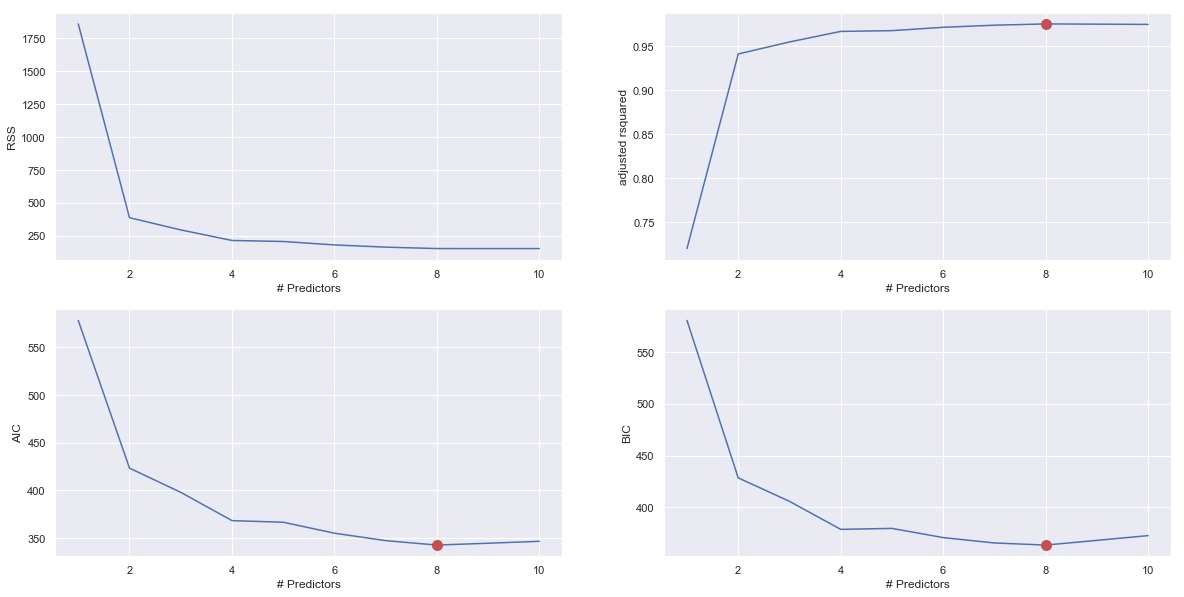

In [198]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

**(d)** Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

>Forward and backward stepwise also choose 8 predictors. Though the predictors are slightly different.

In [210]:
# forward selection h/t jcrouser

def forward(predictors):
    
    # pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
        
        
    # wrap everything into a df
    models = pd.DataFrame(results)
    
    # choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # return the best model
    return best_model

In [211]:
models2 = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1, len(X.columns)+1):
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]["model"].model.exog_names
    
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.05638408660888672 seconds.
Processed  9 models on 2 predictors in 0.051980018615722656 seconds.
Processed  8 models on 3 predictors in 0.04135298728942871 seconds.
Processed  7 models on 4 predictors in 0.028679847717285156 seconds.
Processed  6 models on 5 predictors in 0.02362823486328125 seconds.
Processed  5 models on 6 predictors in 0.022297143936157227 seconds.
Processed  4 models on 7 predictors in 0.02277088165283203 seconds.
Processed  3 models on 8 predictors in 0.023800134658813477 seconds.
Processed  2 models on 9 predictors in 0.008709907531738281 seconds.
Processed  1 models on 10 predictors in 0.005942106246948242 seconds.
Total elapsed time: 0.3572421073913574 seconds.


Text(0,0.5,'BIC')

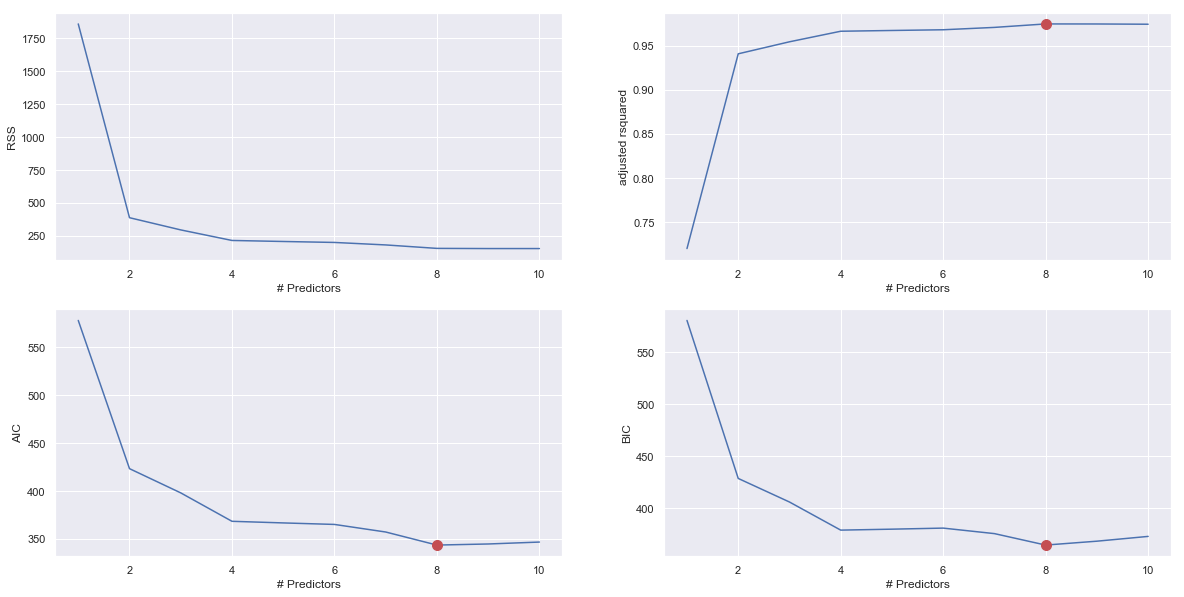

In [214]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models2["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models2.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models2.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models2.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [222]:
# backward selection h/t jcrouser

def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [223]:
models3 = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models3.loc[len(predictors)-1] = backward(predictors)
    predictors = models3.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 9 predictors in 0.06475496292114258 seconds.
Processed  9 models on 8 predictors in 0.05455303192138672 seconds.
Processed  8 models on 7 predictors in 0.042188167572021484 seconds.
Processed  7 models on 6 predictors in 0.04074382781982422 seconds.
Processed  6 models on 5 predictors in 0.024703025817871094 seconds.
Processed  5 models on 4 predictors in 0.02111983299255371 seconds.
Processed  4 models on 3 predictors in 0.02850484848022461 seconds.
Processed  3 models on 2 predictors in 0.016854047775268555 seconds.
Processed  2 models on 1 predictors in 0.010973215103149414 seconds.
Total elapsed time: 0.3396952152252197 seconds.


Text(0,0.5,'BIC')

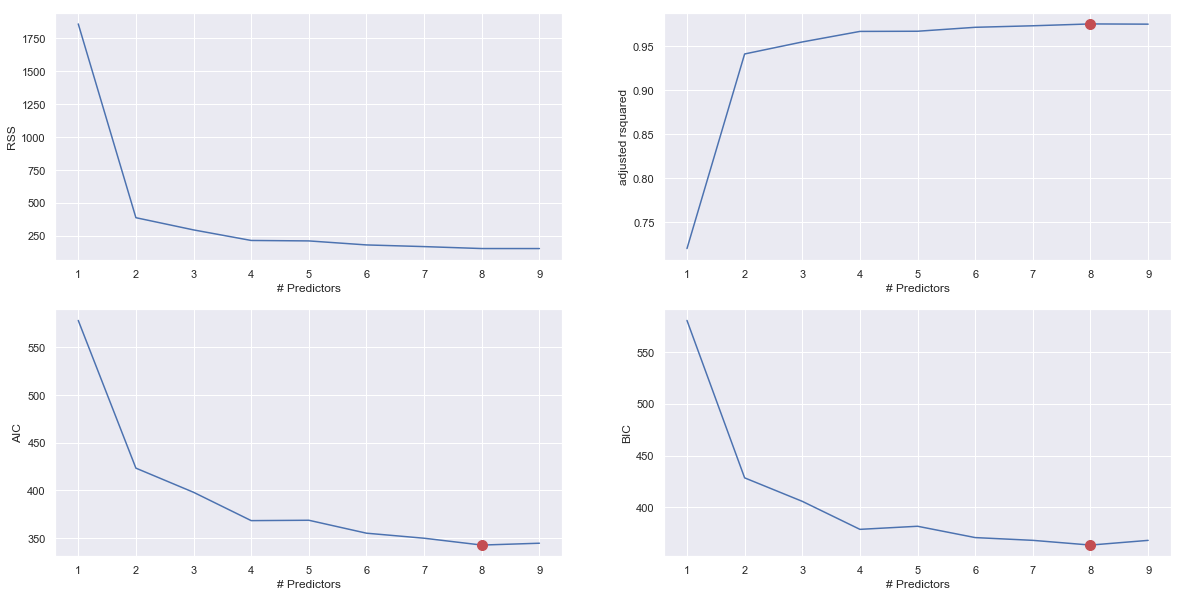

In [224]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models3["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models3.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models3.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models3.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [230]:
print(models2.loc[7, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     478.5
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.32e-70
Time:                        10:40:41   Log-Likelihood:                -171.63
No. Observations:                 100   AIC:                             357.3
Df Residuals:                      93   BIC:                             375.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x3             1.6691      0.363      4.601      0.0

In [231]:
print(models.loc[7, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     529.2
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.63e-72
Time:                        10:40:48   Log-Likelihood:                -166.73
No. Observations:                 100   AIC:                             347.5
Df Residuals:                      93   BIC:                             365.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x2            -7.0386      1.148     -6.133      0.0

### Lasso

with sklearn

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

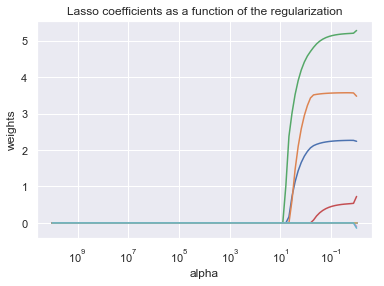

In [251]:
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [252]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [253]:
lassocv.alpha_

0.05416318271973754

In [254]:
pd.Series(lasso.coef_, index=X.columns)

x1     2.239546
x2     3.475760
x3     5.280044
x4     0.726720
x5    -0.000000
x6    -0.000000
x7    -0.094818
x8    -0.000000
x9    -0.000000
x10   -0.143118
dtype: float64

In [270]:
print(models3.loc[3, "model"].params)

x1    1.800951
x3    1.675530
x4    0.550360
dtype: float64


In [255]:
ls = Lasso(alpha=.05416, max_iter=100000, tol=.0001)
ls.fit(X, y)

Lasso(alpha=0.05416, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [256]:
ls.intercept_, ls.coef_

(-1.463655136044762,
 array([ 1.29409231,  1.37952859,  2.21387262,  0.76921408,  0.        ,
         0.        , -0.07482301, -0.05012109,  0.01039635,  0.00623001]))

In [259]:
B0,B1,B2,B3

(-2, 2, 3, 1.5)

In [273]:
alphas=np.linspace(.01, 100, 1000)
print(alphas.shape)
alphas.max()

(1000,)


100.0

**9.** In this exercise, we will predict the number of applications received using the other variables in the College data set.

**(a)** Split the data set into a training set and a test set.

**(b)** Fit a linear model using least squares on the training set, and
report the test error obtained.

In [274]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/College.csv')

In [277]:
df=df.rename(index=str, columns={"Unnamed: 0": "School"})
df.head()

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [510]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [278]:
df.describe(include='object')

,School,Private
count,777,777
unique,777,2
top,Elms College,Yes
freq,1,565


In [279]:
dummies = pd.get_dummies(df[['Private']])
dummies.info()
print(dummies.head())

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 776
Data columns (total 2 columns):
Private_No     777 non-null uint8
Private_Yes    777 non-null uint8
dtypes: uint8(2)
memory usage: 7.6+ KB
   Private_No  Private_Yes
0           0            1
1           0            1
2           0            1
3           0            1
4           0            1


In [282]:
y = df.Apps

X_ = df.drop(['School','Apps','Private'], axis=1).astype('float64')

X = pd.concat([X_, dummies[['Private_Yes']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 776
Data columns (total 17 columns):
Accept         777 non-null float64
Enroll         777 non-null float64
Top10perc      777 non-null float64
Top25perc      777 non-null float64
F.Undergrad    777 non-null float64
P.Undergrad    777 non-null float64
Outstate       777 non-null float64
Room.Board     777 non-null float64
Books          777 non-null float64
Personal       777 non-null float64
PhD            777 non-null float64
Terminal       777 non-null float64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null float64
Expend         777 non-null float64
Grad.Rate      777 non-null float64
Private_Yes    777 non-null uint8
dtypes: float64(16), uint8(1)
memory usage: 104.0+ KB


In [287]:
# check 'Private_Yes' = our original count of 'Private'
X['Private_Yes'].sum()

565

In [288]:
# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [362]:
# fit a linear model using LS on training set

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [363]:
# get test error manually...
np.mean((lr.predict(X_test)-y_test)**2)

910867.8599017715

In [364]:
# or use sklearn.metrics api to get mse
mean_squared_error(y_test, lr.predict(X_test))

910867.8599017715

In [355]:
# coefficients
pd.Series(lr.coef_, index=X.columns)

Accept           1.613062
Enroll          -0.880831
Top10perc       51.253431
Top25perc      -14.609791
F.Undergrad      0.034013
P.Undergrad      0.070679
Outstate        -0.077960
Room.Board       0.110344
Books            0.159255
Personal         0.008179
PhD             -9.615663
Terminal        -2.293671
S.F.Ratio        6.684629
perc.alumni     -2.331129
Expend           0.063549
Grad.Rate        8.917708
Private_Yes   -511.153808
dtype: float64

**(c)** Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

In [603]:
alpha = 10**np.linspace(4,-2,100)
rlr = RidgeCV(alphas=alpha, cv=10,normalize=True)

rlr.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000e+04, 8.69749e+03, ..., 1.14976e-02, 1.00000e-02]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [604]:
# slightly lower test MSE than plain LS
mean_squared_error(y_test, rlr.predict(X_test))

896915.4476522938

In [605]:
rlr.alpha_

0.017475284000076828

In [606]:
# coefficients
pd.Series(rlr.coef_, index=X.columns)

Accept           1.428231
Enroll          -0.328347
Top10perc       41.613509
Top25perc       -8.436919
F.Undergrad      0.015024
P.Undergrad      0.060849
Outstate        -0.061765
Room.Board       0.136194
Books            0.171392
Personal        -0.003348
PhD             -8.142372
Terminal        -2.966804
S.F.Ratio        6.790207
perc.alumni     -5.513433
Expend           0.066346
Grad.Rate        9.813371
Private_Yes   -514.517117
dtype: float64

**(d)** Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [608]:
#llr = LassoCV(alphas=np.linspace(.01, 100, 1000), cv=10)
llr = LassoCV(alphas=alpha, cv=10, normalize=True, max_iter=1e5)
llr.fit(X_train, y_train)

LassoCV(alphas=array([1.00000e+04, 8.69749e+03, ..., 1.14976e-02, 1.00000e-02]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=100000.0,
    n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [609]:
llr.alpha_

1.747528400007683

In [610]:
# even higher test MSE
mean_squared_error(y_test, llr.predict(X_test))

973509.6691123104

In [617]:
# coefficients
# some coef are exactly zero
pd.Series(llr.coef_, index=X.columns)

Accept           1.402415
Enroll          -0.035649
Top10perc       27.225485
Top25perc       -0.000000
F.Undergrad     -0.000000
P.Undergrad      0.007924
Outstate        -0.023637
Room.Board       0.052806
Books            0.000000
Personal         0.000000
PhD             -3.806827
Terminal        -0.000000
S.F.Ratio        0.000000
perc.alumni     -2.453919
Expend           0.049372
Grad.Rate        2.925253
Private_Yes   -252.850340
dtype: float64

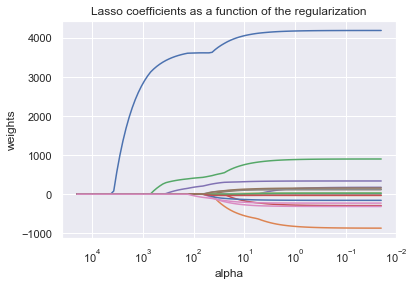

In [494]:
alphas = 10**np.linspace(4,-2,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');